In [3]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb


In [4]:
df = pd.read_csv("/Users/haaland/Desktop/jupyter/car_price_prediction.csv")

## Basic information

In [5]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


##  ELT

缺失值处理

把levy这一列的'-'都转化成为'0'，然后再转换成浮点型为了后续计算。

In [8]:
df['Levy'] = df['Levy'].replace('-', 0)

In [9]:
df['Levy'] = df['Levy'].astype('float64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [11]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


修改变量值

一开始是列名是Prod. year，为了方便计算以及数据更清晰，用今年的年份减去生产年限来作为汽车使用的年限，并更改列名为Age。

In [12]:
df.rename(columns={'Prod. year': 'Age'}, inplace=True)

In [13]:
df['Age'] = 2024 - df['Age']

In [14]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,14,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,13,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,18,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,13,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,10,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


修改变量类型

将变量修改为bool类型以方便后续计算

In [15]:
df['Leather interior'] = df['Leather interior'].replace({'Yes': 1, 'No': 0})

In [16]:
df['Leather interior'] = df['Leather interior'].astype(bool)

In [17]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


删除重复数据

In [18]:
df.duplicated().sum()

313

In [19]:
df = df.drop_duplicates()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Age               18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  bool   
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

去掉Mileage数据中的单位来方便计算。然后改变数据类型为float

In [21]:
df['Mileage'] = df['Mileage'].str.strip('km')

In [22]:
df['Mileage'] = df['Mileage'].astype('int')

In [23]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


超过1000000的Mileage可能为异常值，删除带有异常值的列

In [24]:
print(df['Mileage'].describe())

count    1.892400e+04
mean     1.555373e+06
std      4.880221e+07
min      0.000000e+00
25%      7.019575e+04
50%      1.264000e+05
75%      1.891198e+05
max      2.147484e+09
Name: Mileage, dtype: float64


In [25]:
df = df[df['Mileage'] <= 1000000]

In [26]:
print(df['Mileage'].describe())

count      18851.000000
mean      140171.950188
std       103053.996056
min            0.000000
25%        70000.000000
50%       126000.000000
75%       188080.500000
max      1000000.000000
Name: Mileage, dtype: float64


Engine volume将所有带Turbo的取消，改变列名的数据类型为float。然后添加新的一列，作用是是否带turbo。列名为Turbo设置为bool类型。1表示有Turbo，0表示没有。

In [27]:
df['Turbo'] = df['Engine volume'].str.contains('Turbo').astype(int)

In [28]:
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '')

In [29]:
df['Engine volume'] = df['Engine volume'].astype('float64')

In [30]:
df['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [31]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,44731507,16621,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,45774419,8467,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,45769185,3607,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,45809263,11726,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18851 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18851 non-null  int64  
 1   Price             18851 non-null  int64  
 2   Levy              18851 non-null  float64
 3   Manufacturer      18851 non-null  object 
 4   Model             18851 non-null  object 
 5   Age               18851 non-null  int64  
 6   Category          18851 non-null  object 
 7   Leather interior  18851 non-null  bool   
 8   Fuel type         18851 non-null  object 
 9   Engine volume     18851 non-null  float64
 10  Mileage           18851 non-null  int64  
 11  Cylinders         18851 non-null  float64
 12  Gear box type     18851 non-null  object 
 13  Drive wheels      18851 non-null  object 
 14  Doors             18851 non-null  object 
 15  Wheel             18851 non-null  object 
 16  Color             18851 non-null  object 
 17

将Doors这一列的数据简化，以便更清楚的进行运算。

In [33]:
df['Doors'] = df['Doors'].replace('04-May', 4)

In [34]:
df['Doors'] = df['Doors'].replace('02-Mar', 2)

In [35]:
df['Doors'] = df['Doors'].replace('>5', 6)

In [36]:
df['Doors'] = df['Doors'].astype('int')

In [37]:
df['Doors'].value_counts()

Doors
4    17968
2      762
6      121
Name: count, dtype: int64

In [38]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,44731507,16621,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,45774419,8467,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,45769185,3607,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,45809263,11726,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


删除ID列，因为没用。

In [39]:
df = df.drop('ID', axis=1)

In [40]:
df.head()

,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


汇总

In [41]:
df_clean = df

## EDA

In [42]:
df_clean.head()

,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18851 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18851 non-null  int64  
 1   Levy              18851 non-null  float64
 2   Manufacturer      18851 non-null  object 
 3   Model             18851 non-null  object 
 4   Age               18851 non-null  int64  
 5   Category          18851 non-null  object 
 6   Leather interior  18851 non-null  bool   
 7   Fuel type         18851 non-null  object 
 8   Engine volume     18851 non-null  float64
 9   Mileage           18851 non-null  int64  
 10  Cylinders         18851 non-null  float64
 11  Gear box type     18851 non-null  object 
 12  Drive wheels      18851 non-null  object 
 13  Doors             18851 non-null  int64  
 14  Wheel             18851 non-null  object 
 15  Color             18851 non-null  object 
 16  Airbags           18851 non-null  int64  
 17

Manufacturer

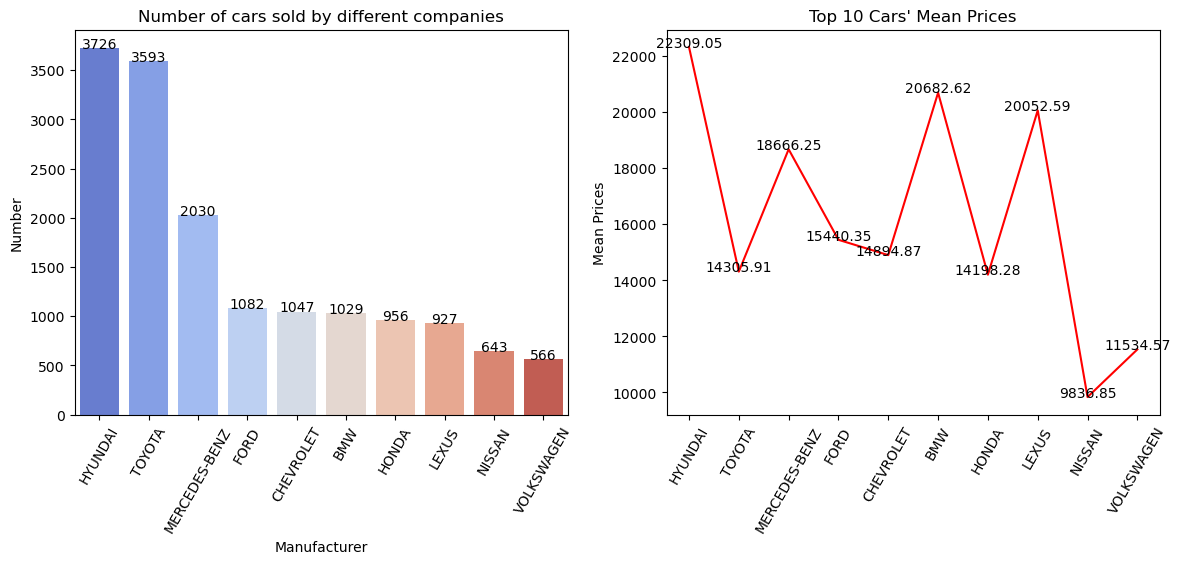

In [44]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)

# 统计不同汽车公司的数量（前十名）
Manufacturer = df_clean['Manufacturer'].value_counts().sort_values(ascending = False)[:10]
p = sns.barplot(x=Manufacturer.index, y=Manufacturer.values, palette="coolwarm")
plt.title('Number of cars sold by different companies')
plt.xticks(rotation=60)
plt.ylabel('Number')

# 在柱状图的每个柱子上方显示数量
for i in p.patches:
    height = i.get_height()
    ax1.text(i.get_x() + i.get_width() / 2., height, int(height), ha="center")
    
ax2 = fig.add_subplot(122)
mean = [df_clean[df_clean['Manufacturer']==i]['Price'].mean() for i in list(Manufacturer.index)]

plt.plot(Manufacturer.index, mean, color='r')
plt.xticks(rotation=60)
plt.ylabel('Mean Prices')
plt.title("Top 10 Cars' Mean Prices")

# 在柱状图的每个柱子上方显示数量
for i, value in enumerate(mean):
    ax2.text(i, value, f"{value:.2f}", ha='center') 
    
plt.show()


Levy

In [45]:
df_clean['Levy'].value_counts().head(10)

Levy
0.0       5643
765.0      482
891.0      453
639.0      403
640.0      398
781.0      294
1017.0     291
707.0      268
642.0      259
836.0      259
Name: count, dtype: int64

<Axes: xlabel='Levy', ylabel='Density'>

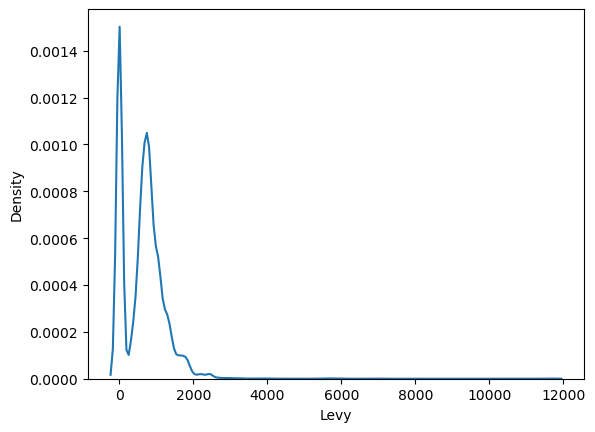

In [46]:
sns.kdeplot(df_clean['Levy'])

Engine Volume

In [47]:
df_clean['Engine volume'].value_counts()

Engine volume
2.0    4246
2.5    2331
1.8    1902
1.6    1553
1.5    1350
       ... 
3.1       1
7.3       1
0.5       1
6.8       1
5.8       1
Name: count, Length: 65, dtype: int64

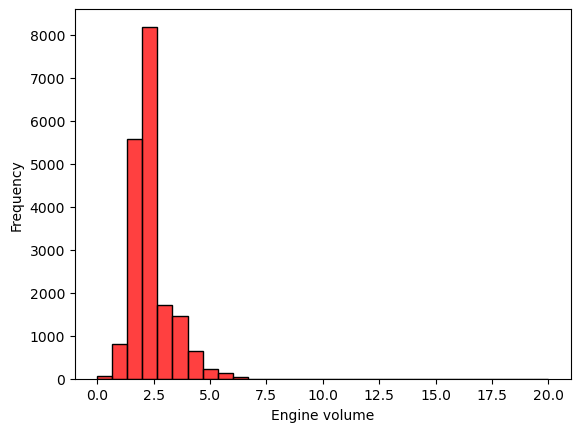

In [48]:
sns.histplot(df_clean['Engine volume'], color='red', bins=30)

plt.xlabel('Engine volume')
plt.ylabel('Frequency')
plt.show()

Age

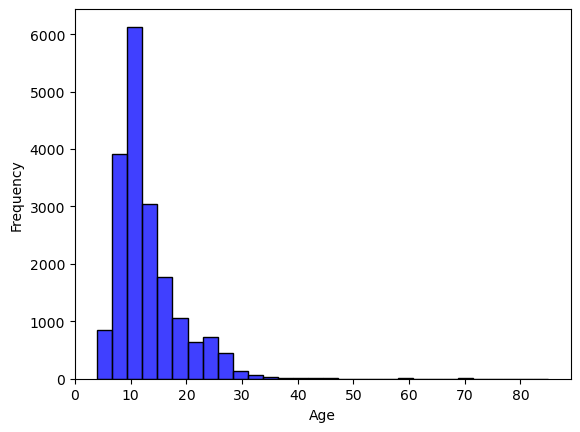

In [49]:
sns.histplot(df_clean['Age'], color='blue', bins=30)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Category

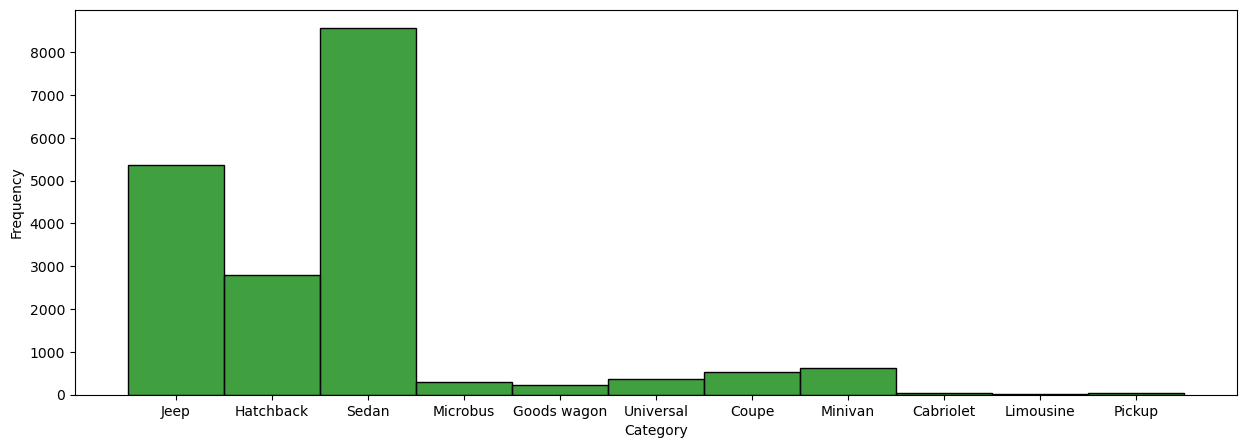

In [50]:
plt.figure(figsize=(15, 5))
sns.histplot(df_clean['Category'], color='green')

plt.xlabel('Category')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Leather interior

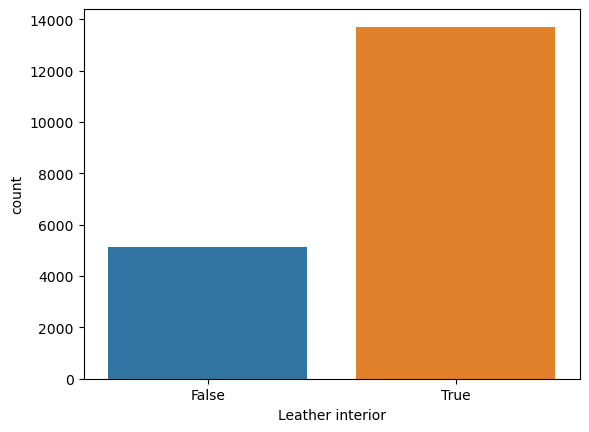

In [51]:
sns.countplot(x='Leather interior', data=df_clean)
plt.show()

Fuel type

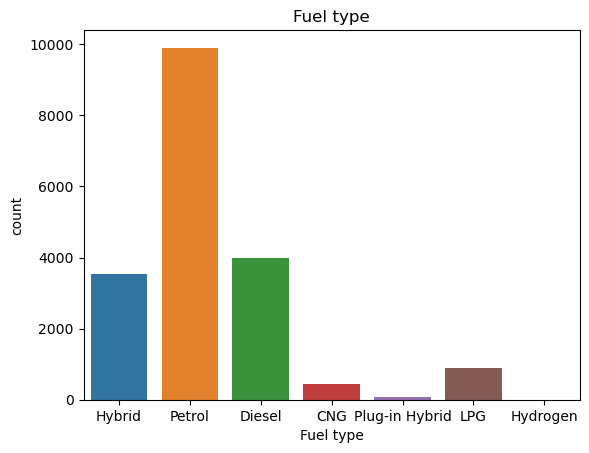

In [52]:
sns.countplot(x='Fuel type', data=df_clean)
plt.title("Fuel type")
plt.show()

Turbo

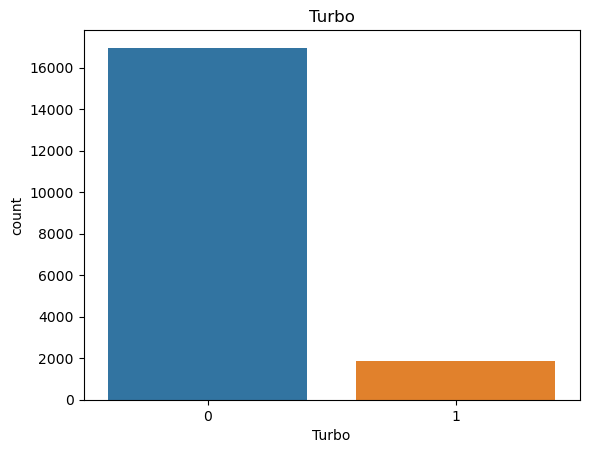

In [53]:
sns.countplot(x='Turbo', data=df_clean)
plt.title("Turbo")
plt.show()

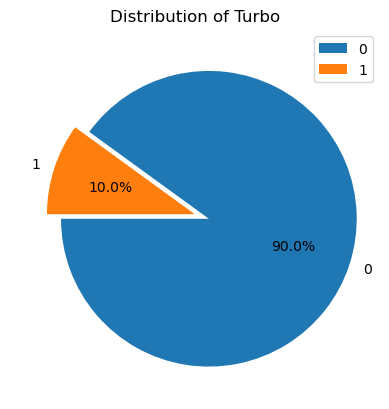

In [54]:
e = (0.1, 0) 
plt.pie(df_clean['Turbo'].value_counts(), labels=df_clean['Turbo'].value_counts().index, autopct='%1.1f%%', startangle=180,  explode=e)

plt.legend()
plt.title('Distribution of Turbo')
plt.show()

Doors

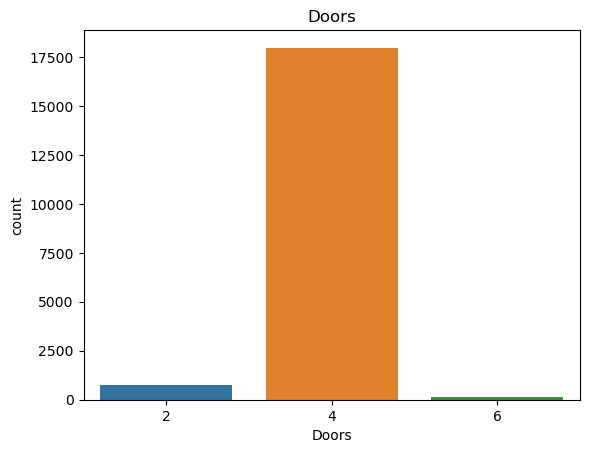

In [55]:
sns.countplot(x='Doors', data=df_clean)
plt.title("Doors")
plt.show()

Mileage

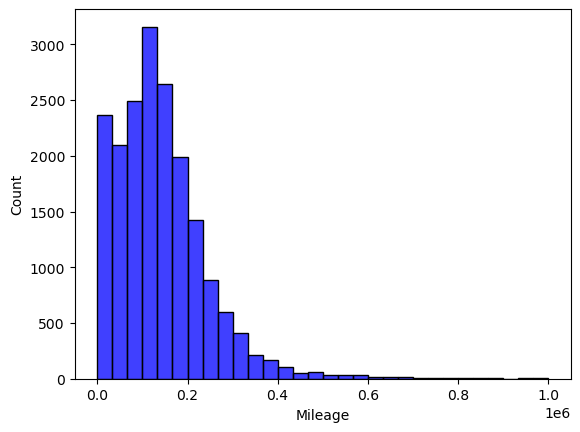

In [56]:
sns.histplot(df_clean['Mileage'], color='blue', bins=30)
plt.show()

In [57]:
print(df_clean['Mileage'].describe())

count      18851.000000
mean      140171.950188
std       103053.996056
min            0.000000
25%        70000.000000
50%       126000.000000
75%       188080.500000
max      1000000.000000
Name: Mileage, dtype: float64


Gear box type

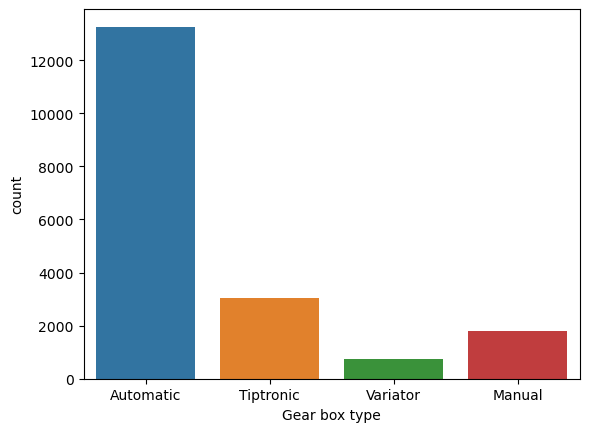

In [58]:
sns.countplot(x='Gear box type', data=df_clean)
plt.show()

Wheel

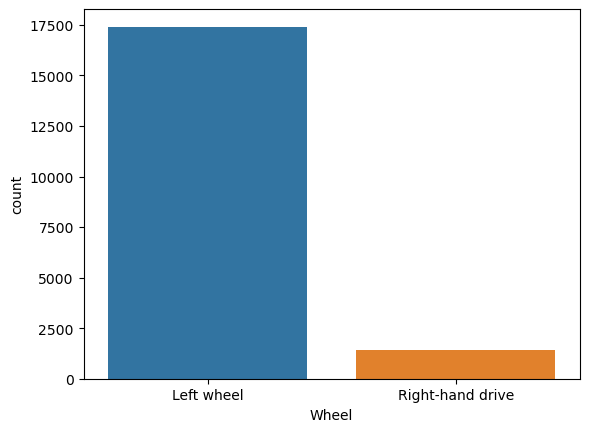

In [59]:
sns.countplot(x='Wheel', data=df_clean)
plt.show()

Cylinders

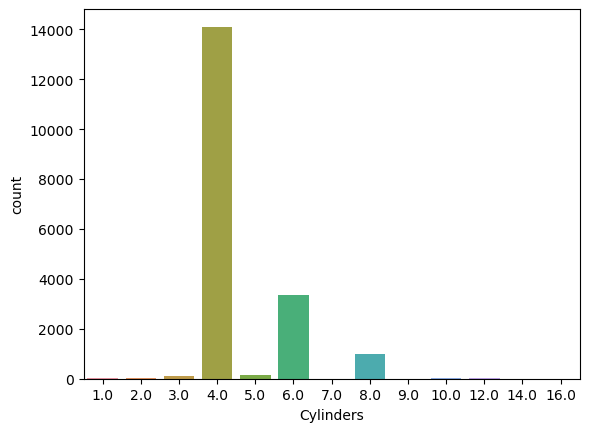

In [60]:
sns.countplot(x='Cylinders', data=df_clean)
plt.show()

Color

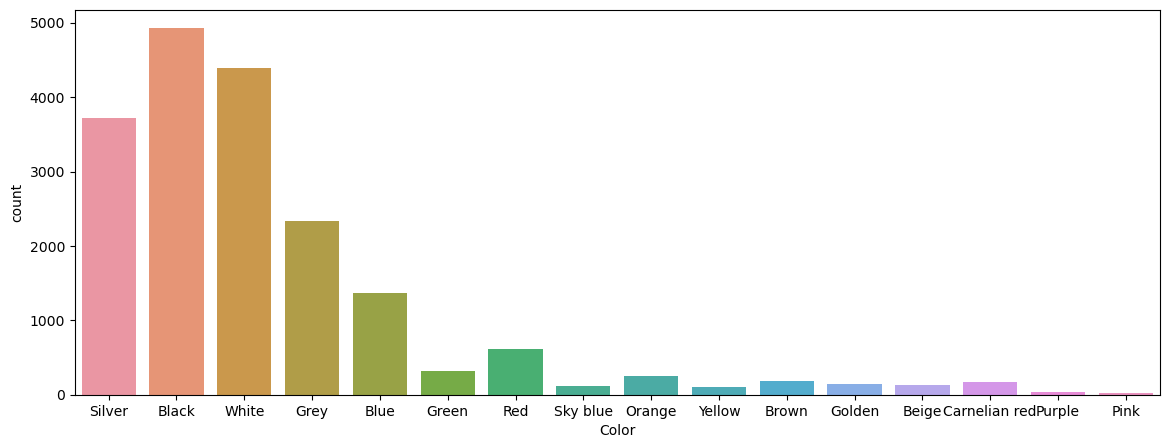

In [61]:
plt.figure(figsize=(14, 5))
sns.countplot(x='Color', data=df_clean)
plt.show()

Airbags

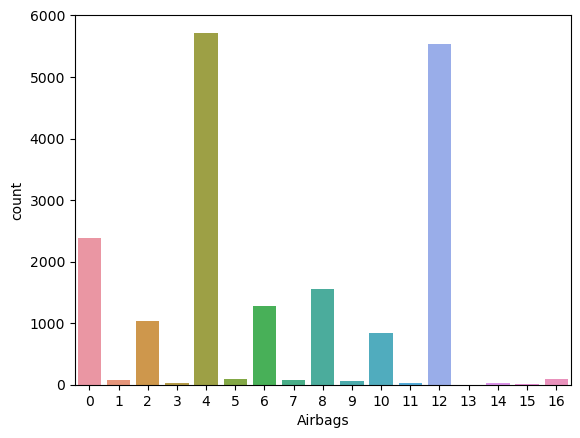

In [62]:
sns.countplot(x='Airbags', data=df_clean)
plt.show()

### corr

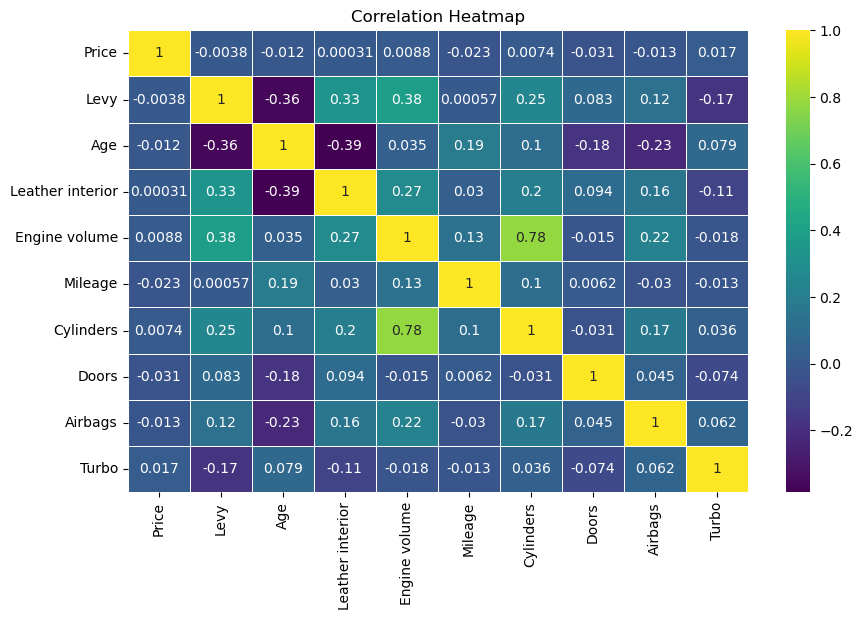

In [63]:
cor= df_clean.select_dtypes(exclude=object).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

如果相关系数的绝对值在0.5以上，我们认为它们有较强的相关性；如果在0.3到0.5之间，我们认为它们有中等程度的相关性；而如果在0.3以下，我们认为它们有弱相关性。

在图中，多数变量与价格的相关性似乎都不是特别强。这并不意味着这些变量对价格没有影响，因为单变量的相关系数无法捕捉到变量之间的可能的复杂交互作用，也可能存在非线性关系，这些都是单纯的相关性分析无法表达的。

In [64]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18851 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18851 non-null  int64  
 1   Levy              18851 non-null  float64
 2   Manufacturer      18851 non-null  object 
 3   Model             18851 non-null  object 
 4   Age               18851 non-null  int64  
 5   Category          18851 non-null  object 
 6   Leather interior  18851 non-null  bool   
 7   Fuel type         18851 non-null  object 
 8   Engine volume     18851 non-null  float64
 9   Mileage           18851 non-null  int64  
 10  Cylinders         18851 non-null  float64
 11  Gear box type     18851 non-null  object 
 12  Drive wheels      18851 non-null  object 
 13  Doors             18851 non-null  int64  
 14  Wheel             18851 non-null  object 
 15  Color             18851 non-null  object 
 16  Airbags           18851 non-null  int64  
 17

## Model

检查异常值

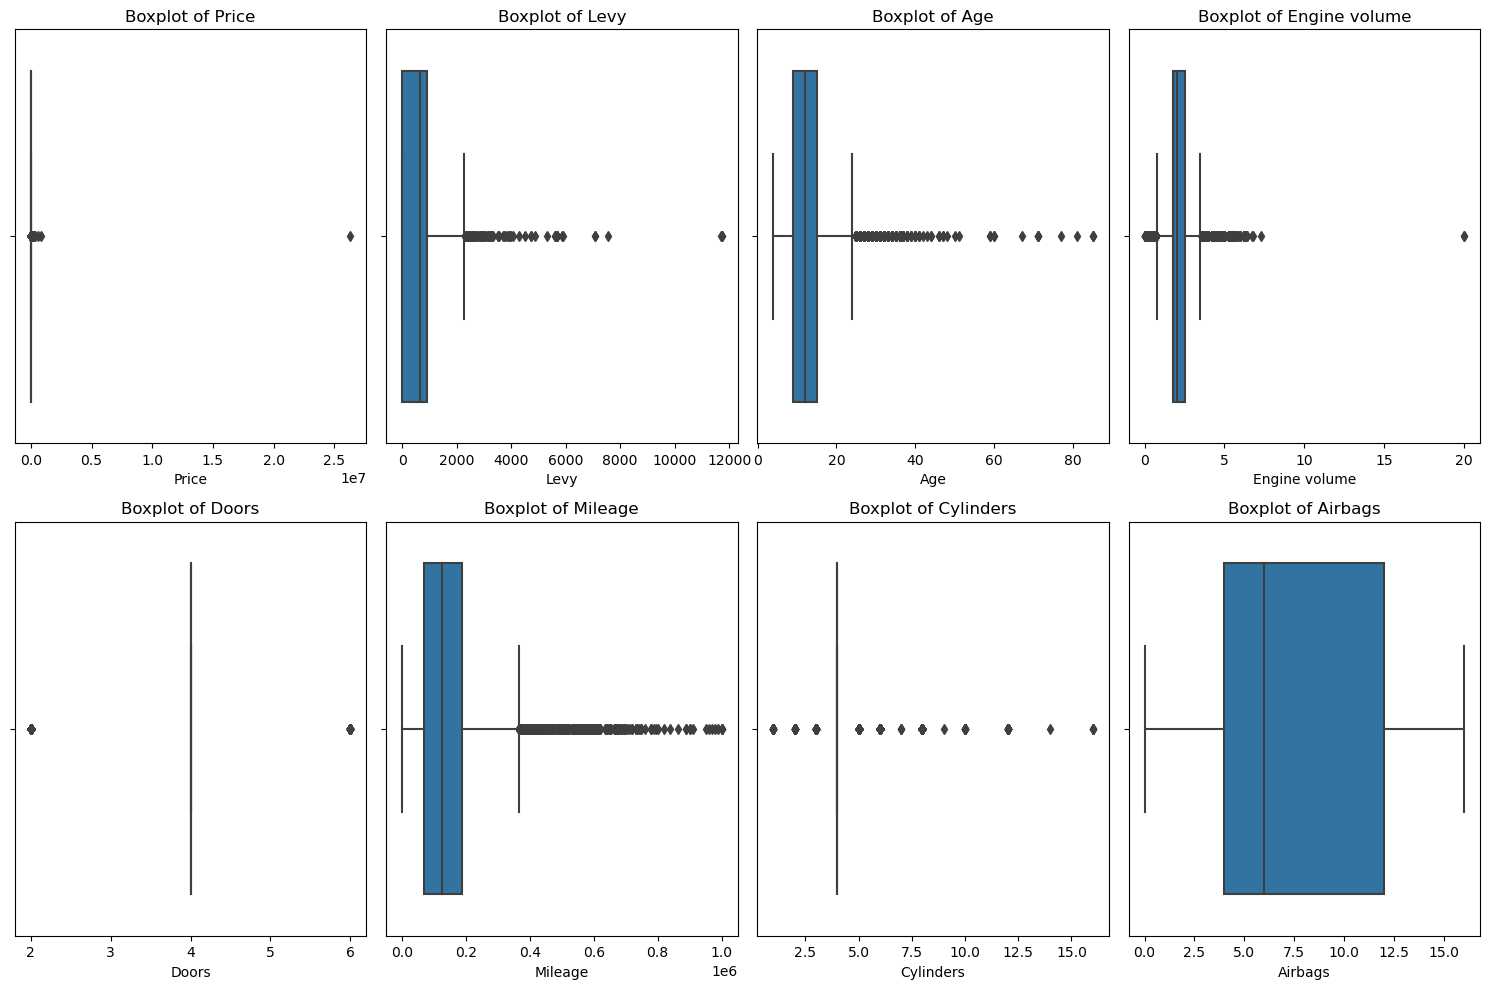

In [65]:
detect_columns = ['Price', 'Levy', 'Age', 'Engine volume', 'Doors', 'Mileage', 'Cylinders', 'Airbags']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each specified column
for index, column in enumerate(detect_columns, 1):
    plt.subplot(2, 4, index)  # Creates subplots in a 2x4 grid
    sns.boxplot(x=df_clean[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()


In [66]:
detect_columns_2 = ['Price', 'Levy', 'Age', 'Engine volume', 'Mileage']
outliers_dict = {}

for col in detect_columns_2:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 计算异常值的边界
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 检测异常值
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    
    # 保存异常值的信息
    outliers_dict[col] = outliers

# 输出每一列的异常值数量
for col, outlier_df in outliers_dict.items():
    print(f"列 '{col}' 的异常值数量为: {outlier_df.shape[0]}")


列 'Price' 的异常值数量为: 1035
列 'Levy' 的异常值数量为: 160
列 'Age' 的异常值数量为: 931
列 'Engine volume' 的异常值数量为: 1356
列 'Mileage' 的异常值数量为: 573


In [67]:
for col in detect_columns_2:
    # 计算每一列的第一四分位数和第三四分位数以及IQR
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 定义异常值的下界和上界
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 将低于下界的值设为下界，将高于上界的值设为上界
    df[col] = df[col].clip(lower_bound, upper_bound)



In [68]:
outliers_dict = {}

for col in detect_columns_2:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 计算异常值的边界
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 检测异常值
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    
    # 保存异常值的信息
    outliers_dict[col] = outliers

# 输出每一列的异常值数量
for col, outlier_df in outliers_dict.items():
    print(f"列 '{col}' 的异常值数量为: {outlier_df.shape[0]}")

列 'Price' 的异常值数量为: 0
列 'Levy' 的异常值数量为: 0
列 'Age' 的异常值数量为: 0
列 'Engine volume' 的异常值数量为: 0
列 'Mileage' 的异常值数量为: 0


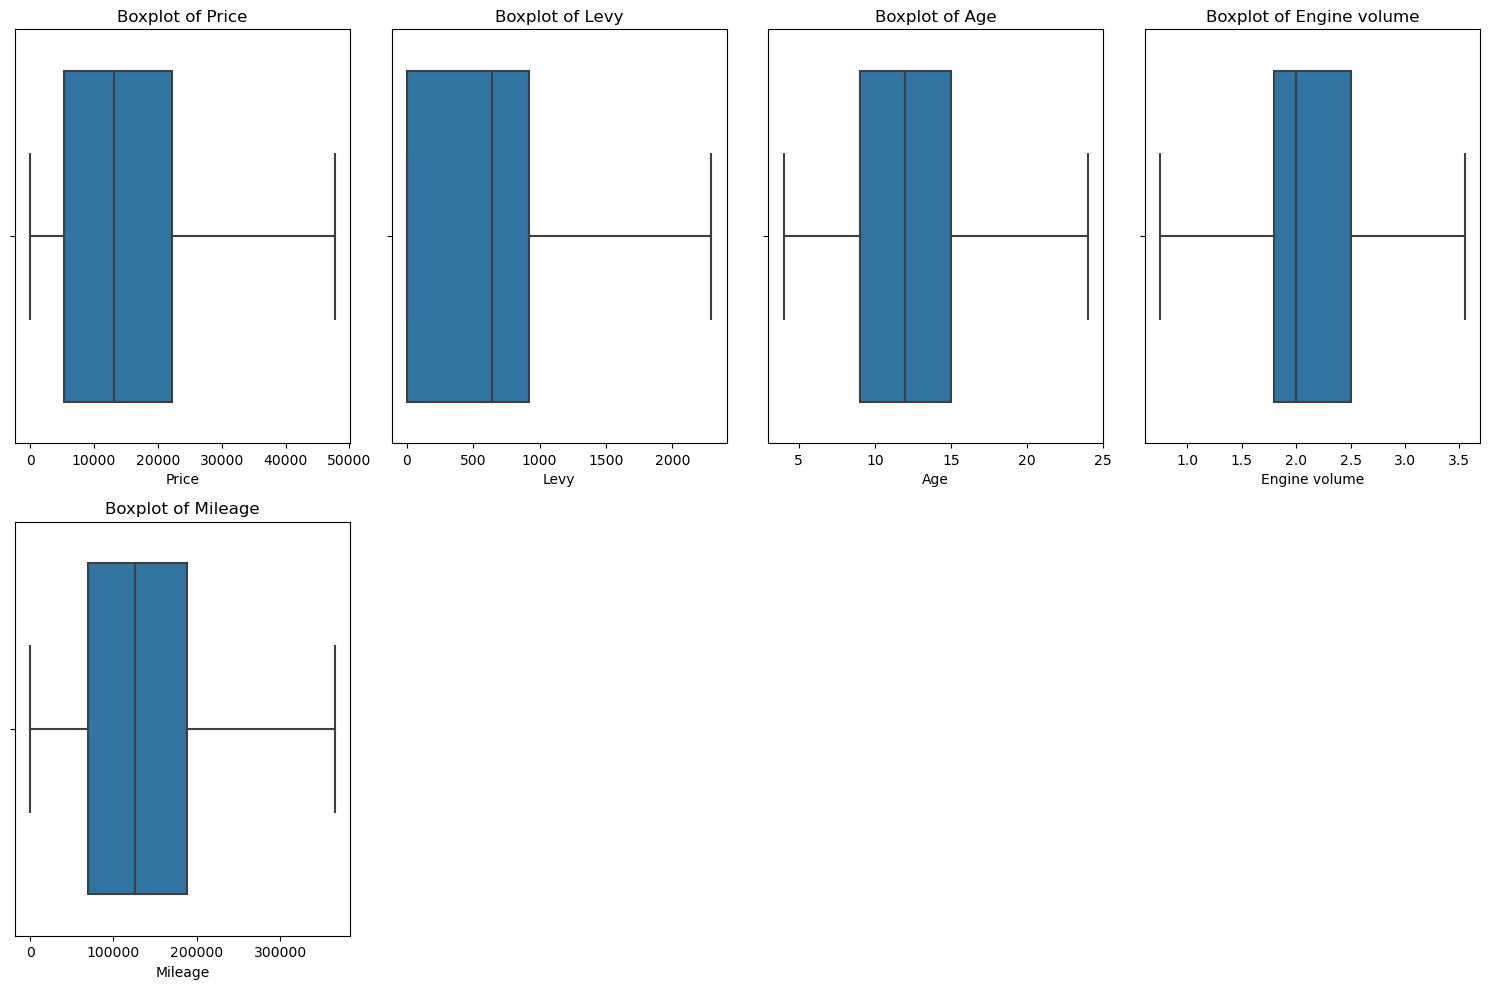

In [69]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each specified column
for index, column in enumerate(detect_columns_2, 1):
    plt.subplot(2, 4, index)  # Creates subplots in a 2x4 grid
    sns.boxplot(x=df_clean[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18851 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18851 non-null  float64
 1   Levy              18851 non-null  float64
 2   Manufacturer      18851 non-null  object 
 3   Model             18851 non-null  object 
 4   Age               18851 non-null  int64  
 5   Category          18851 non-null  object 
 6   Leather interior  18851 non-null  bool   
 7   Fuel type         18851 non-null  object 
 8   Engine volume     18851 non-null  float64
 9   Mileage           18851 non-null  float64
 10  Cylinders         18851 non-null  float64
 11  Gear box type     18851 non-null  object 
 12  Drive wheels      18851 non-null  object 
 13  Doors             18851 non-null  int64  
 14  Wheel             18851 non-null  object 
 15  Color             18851 non-null  object 
 16  Airbags           18851 non-null  int64  
 17

In [71]:
df_clean.head()

,Price,Levy,Manufacturer,Model,Age,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,1399.0,LEXUS,RX 450,14,Jeep,True,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621.0,1018.0,CHEVROLET,Equinox,13,Jeep,False,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467.0,0.0,HONDA,FIT,18,Hatchback,False,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607.0,862.0,FORD,Escape,13,Jeep,True,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726.0,446.0,HONDA,FIT,10,Hatchback,True,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,0


Convert all object columns to numerical by labelencoder (Because ML Model don't understand object columns)

In [72]:
obdata = df_clean.select_dtypes(include=object)
numdata = df_clean.select_dtypes(exclude=object)

In [73]:
label = LabelEncoder()
for i in range(0,obdata.shape[1]):
    obdata.iloc[:,i] = label.fit_transform(obdata.iloc[:,i]) 

In [74]:
df_num = pd.concat([obdata,numdata],axis=1)

In [75]:
df_num

,Manufacturer,Model,Category,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Age,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,Turbo
0,32,1240,4,2,0,0,0,12,13328.0,1399.0,14,True,3.5,186005.0,6.0,4,12,0
1,8,657,4,5,2,0,0,1,16621.0,1018.0,13,False,3.0,192000.0,6.0,4,8,0
2,21,683,3,5,3,1,1,1,8467.0,0.0,18,False,1.3,200000.0,4.0,4,2,0
3,16,660,4,2,0,0,0,14,3607.0,862.0,13,True,2.5,168966.0,4.0,4,0,0
4,21,683,3,5,0,1,0,12,11726.0,446.0,10,True,1.3,91901.0,4.0,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,36,384,1,0,1,2,0,12,8467.0,0.0,24,True,2.0,300000.0,4.0,2,5,1
19233,23,1332,9,5,2,1,0,11,15681.0,831.0,13,True,2.4,161600.0,4.0,4,8,0
19234,23,1440,4,1,0,1,0,7,26108.0,836.0,14,True,2.0,116365.0,4.0,4,4,0
19235,8,455,4,1,0,1,0,1,5331.0,1288.0,17,True,2.0,51258.0,4.0,4,4,0


Features Selection and Target

In [76]:
x= df_num.drop(['Price'],axis=1)
y= df_num['Price']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [78]:
algorithm = ['LinearRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingRegressor','SVR']
R2=[]
RMSE = []

In [79]:
def models(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    r2 = r2_score(y_test,pre)
    rmse = np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score = model.score(x_test,y_test)
    print(f'The Score of Model is :{score}')

In [80]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()
model5 = SVR()
# model6 = xgb.XGBRegressor()

In [81]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)
# models(model6)

The Score of Model is :0.3094846288676082
The Score of Model is :0.6164658217001602
The Score of Model is :0.7853489052283064
The Score of Model is :0.6489568020985745
The Score of Model is :-0.023397276929556954


In [82]:
R = pd.DataFrame({'Algorithm':algorithm, 'R2_score': R2, 'RMSE':RMSE})
R

,Algorithm,R2_score,RMSE
0,LinearRegression,0.309485,11167.297627
1,DecisionTreeClassifier,0.616466,8322.684884
2,RandomForestClassifier,0.785349,6226.270284
3,GradientBoostingRegressor,0.648957,7962.357936
4,SVR,-0.023397,13595.135617


In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'n_estimators': [50, 100, 200],   # 树的数量
    'max_depth': [None, 10, 20, 30],  # 树的最大深度
    'min_samples_split': [2, 5, 10],  # 分割内部节点所需的最少样本数
    'min_samples_leaf': [1, 2, 4],    # 在叶节点处需要的最小样本数
    'max_features': ['auto', 'sqrt'], # 寻找最佳分割时要考虑的特征数量
}

# 初始化随机森林回归器
rf = RandomForestRegressor()

# 使用网格搜索进行参数调优
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# 拟合网格搜索
grid_search.fit(x_train, y_train)

# 打印最佳参数组合
print(f"Best parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n

/Users/haaland/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, m

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max

/Users/haaland/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
142 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/haaland/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/haaland/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/haaland/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  Fi

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [100]:
regressor = RandomForestRegressor(
    n_estimators=200, 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features='sqrt'
)

models(regressor)

The Score of Model is :0.7944988519493074


In [88]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],  # 要尝试的树的数量
    'learning_rate': [0.01, 0.1, 0.2],  # 学习率
    'max_depth': [3, 4, 5],  # 树的最大深度
    'min_samples_split': [2, 3],  # 拆分内部节点所需的最小样本数
    'min_samples_leaf': [1, 2],  # 叶节点所需的最小样本数
    'subsample': [0.8, 0.9, 1.0],  # 用于拟合各个基学习器的样本比例
    'max_features': ['sqrt', 'log2', None]  # 寻找最佳分割时要考虑的特征数量
}

# 创建GradientBoostingRegressor模型实例
gbr = GradientBoostingRegressor()

# 设置网格搜索
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# 对训练数据集进行拟合
grid_search.fit(x_train, y_train)

# 打印最佳参数组合
print(f"Best parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.9}


In [93]:
regressor_GBR = GradientBoostingRegressor(
    learning_rate = 0.1, 
    max_depth = 5, 
    max_features = None, 
    min_samples_leaf = 2, 
    min_samples_split = 2, 
    n_estimators = 300, 
    subsample = 0.9
)

models(regressor_GBR)

The Score of Model is :0.7735303249340595
